In [114]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ast import literal_eval
from collections import Counter, defaultdict
import json

import warnings
#warnings.filterwarnings('ignore')
#plt.style.use('fivethirtyeight')

In [2]:
def customparser(data):
    return json.loads(data)

# Cleaning and compiling movies data

In [24]:
data = pd.read_csv('movies_metadata.csv').drop_duplicates()
data = data.drop(['homepage','adult','imdb_id','tagline','production_companies','poster_path','original_title','overview','video'],axis=1)
data = data.drop([19730,29503,35587])
data['original_language'] = (data['original_language'] == 'en') #true if english, false if not english
data['id'] = data['id'].astype(int)
data['budget'] = data['budget'].astype(int)
data['popularity'] = data['popularity'].astype(float)
data['release_date'] = pd.to_datetime(data['release_date'])
data['year'] = pd.DatetimeIndex(data['release_date']).year
data['month'] = pd.DatetimeIndex(data['release_date']).month
data['day'] = pd.DatetimeIndex(data['release_date']).day
#data['adult'] = data['adult'].map({'True':True,'False':False})
data = data[data.status != 'Canceled']

In [17]:
data.head(2)

,belongs_to_collection,budget,genres,id,original_language,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year,month
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,True,21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Toy Story,7.7,5415.0,1995.0,10.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,True,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Jumanji,6.9,2413.0,1995.0,12.0


In [25]:
collvalues = data['belongs_to_collection'].values.tolist()
newcoll = []

#for each in collvalues:
#    if type(each) != float:
#        newcoll.append(literal_eval(each)['name'])
#    else:
#        newcoll.append(float('nan'))
        
for each in collvalues:
    if type(each) != float:
        newcoll.append(True)
    else:
        newcoll.append(False)

In [26]:
genresvalues = data['genres'].values
newgenre = []
for each in genresvalues:
    newgenre.append([literal_eval(each)[i]['name'] for i in range(len(literal_eval(each)))])

In [ ]:
set(x for l in newgenre for x in l)

In [27]:
covalues = data['production_countries'].values
newco = []
for each in covalues:
    if type(each) != float:
        lst = [literal_eval(each)[i]['name'] for i in range(len(literal_eval(each)))]
        if 'United States of America' in lst:
            newco.append(True)
        else:
            newco.append(False)
    else:
        newco.append(False)

In [ ]:
set(x for l in newco for x in l)

In [ ]:
prodvalues = data['production_companies'].values
newprod = []
for each in prodvalues:
    if type(each) != float:
        newprod.append([literal_eval(each)[i]['name'] for i in range(len(literal_eval(each)))])
    else:
        newprod.append([])

In [ ]:
sorted(list(set(x for l in newprod for x in l)))

In [28]:
langvalues = data['spoken_languages'].values
newlang = []
for each in langvalues:
    if type(each) != float:
        newlang.append([literal_eval(each)[i]['name'] for i in range(len(literal_eval(each)))])
    else:
        newlang.append([])

In [ ]:
set(x for l in newlang for x in l)

In [29]:
data['belongs_to_collection'] = np.array(newcoll)
data['genres'] = np.array(newgenre)
#data['production_companies'] = np.array(newprod)
data['spoken_languages'] = np.array(newlang)
data['production_countries'] = np.array(newco)

In [30]:
data.head(2)

,belongs_to_collection,budget,genres,id,original_language,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year,month,day
0,True,30000000,"[Animation, Comedy, Family]",862,True,21.946943,True,1995-10-30,373554033.0,81.0,[English],Released,Toy Story,7.7,5415.0,1995.0,10.0,30.0
1,False,65000000,"[Adventure, Fantasy, Family]",8844,True,17.015539,True,1995-12-15,262797249.0,104.0,"[English, Français]",Released,Jumanji,6.9,2413.0,1995.0,12.0,15.0


In [32]:
keywords = pd.read_csv('keywords.csv').drop_duplicates()

In [34]:
keyval = keywords['keywords'].values
newkey = []
for each in keyval:
    if type(each) != float:
        newkey.append([literal_eval(each)[i]['name'] for i in range(len(literal_eval(each)))])
    else:
        newkey.append([])

#set(x for l in newkey for x in l)

In [42]:
#flatkey = [item for sublist in newkey for item in sublist]
flatkey = [item for sublist in newkey for item in sublist if "based on" in item]

In [43]:
set(flatkey)

{'based on anime',
 'based on bible',
 'based on cartoon',
 "based on children's book",
 'based on comic',
 'based on fairy tale',
 'based on game',
 'based on graphic novel',
 'based on interviews',
 'based on light novel',
 'based on manga',
 'based on memoir or autobiography',
 'based on movie',
 'based on myths or folklore',
 'based on novel',
 'based on opera',
 'based on play or musical',
 'based on short film',
 'based on short story',
 'based on song, poem or rhyme',
 'based on supposedly true story',
 'based on toy',
 'based on true events',
 'based on true story',
 'based on tv series',
 'based on video game',
 'based on young adult novel'}

In [55]:
tags = ["based on bible","based on children's book","based on graphic novel",
       "based on manga","based on comic","based on light novel","based on novel",
       "based on memoir or autobiography","based on short story",
       "based on young adult novel"]
book = []
for each in newkey:
    if any(t in each for t in tags):
        book.append(True)
    else:
        book.append(False)

In [57]:
keywords['book'] = np.array(book)

In [58]:
keywords['key_tags'] = np.array(newkey)
keywords = keywords.drop(['keywords'],axis=1)

In [70]:
datakeys = pd.merge(data,keywords,how='outer',on=['id'])
datakeys = datakeys.drop([45448,45449])

In [71]:
s = pd.Series(datakeys['genres'])
datakeys = pd.concat([datakeys,pd.get_dummies(s.apply(pd.Series).stack()).sum(level=0)],axis=1)
#datakeys.loc[datakeys.genres.str.len() > 0].apply(lambda x: pd.Series([1] * len(x),index=x)).fillna(0, downcast='infer')

In [72]:
datakeys = datakeys.drop(['genres','release_date','status'],axis=1)

In [73]:
datakeys['original_language'] = (datakeys['original_language'] == 'en')

In [74]:
datakeys.head(5)

,belongs_to_collection,budget,id,original_language,popularity,production_countries,revenue,runtime,spoken_languages,title,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
0,True,30000000.0,862,False,21.946943,True,373554033.0,81.0,[English],Toy Story,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,65000000.0,8844,False,17.015539,True,262797249.0,104.0,"[English, Français]",Jumanji,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,0.0,15602,False,11.712900,True,0.0,101.0,[English],Grumpier Old Men,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,False,16000000.0,31357,False,3.859495,True,81452156.0,127.0,[English],Waiting to Exhale,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,True,0.0,11862,False,8.387519,True,76578911.0,106.0,[English],Father of the Bride Part II,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
df = datakeys.drop(['id','spoken_languages','title','original_language','key_tags'],axis=1)
df['book'] = df['book'].astype(bool)
df['belongs_to_collection'] = df['belongs_to_collection'].astype(bool)
df['production_countries'] = df['production_countries'].astype(bool)

In [88]:
df.corr()

,belongs_to_collection,budget,popularity,production_countries,revenue,runtime,vote_average,vote_count,year,month,...,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
belongs_to_collection,1.000000,0.176388,0.182926,0.071479,0.223357,0.007930,0.044445,0.202261,0.023998,0.021935,...,-0.028822,0.081554,-0.029277,0.021569,-0.078893,0.103766,0.018000,0.030321,-0.022635,-0.015513
budget,0.176388,1.000000,0.449662,0.209694,0.768773,0.134763,0.073506,0.676640,0.131702,0.038790,...,0.019611,-0.037676,-0.018249,0.019159,-0.014227,0.110465,-0.031766,0.073389,0.014316,-0.012447
popularity,0.182926,0.449662,1.000000,0.214527,0.506198,0.129949,0.154380,0.559971,0.131709,0.041672,...,0.011830,0.028106,-0.016424,0.035876,0.003663,0.086820,-0.022489,0.107174,0.007628,-0.011314
production_countries,0.071479,0.209694,0.214527,1.000000,0.164086,0.027199,-0.008004,0.173686,-0.137974,0.017046,...,-0.038837,0.061194,0.051567,0.044013,0.038440,0.068056,0.032302,0.080508,-0.013354,0.081426
revenue,0.223357,0.768773,0.506198,0.164086,1.000000,0.103939,0.083880,0.812022,0.088374,0.031630,...,-0.003288,-0.027696,-0.010339,0.008412,-0.006058,0.084873,-0.024026,0.036460,0.000488,-0.016522
runtime,0.007930,0.134763,0.129949,0.027199,0.103939,1.000000,0.158145,0.113557,0.078825,0.063638,...,0.143938,-0.054048,0.020032,0.019157,0.082346,-0.011206,-0.007625,0.039441,0.083234,0.008700
vote_average,0.044445,0.073506,0.154380,-0.008004,0.083880,0.158145,1.000000,0.123614,0.026138,0.045149,...,0.046442,-0.090048,0.019911,0.016824,0.025349,-0.053786,-0.034303,-0.020642,0.033985,-0.046168
vote_count,0.202261,0.676640,0.559971,0.173686,0.812022,0.113557,0.123614,1.000000,0.106812,0.033988,...,-0.003135,-0.010470,-0.018771,0.024417,-0.017182,0.113074,-0.025409,0.066398,0.001548,-0.012694
year,0.023998,0.131702,0.131709,-0.137974,0.088374,0.078825,0.026138,0.106812,1.000000,-0.017125,...,-0.020771,0.035420,-0.053554,-0.027197,-0.072528,0.027171,0.055268,0.086599,-0.091932,-0.155762
month,0.021935,0.038790,0.041672,0.017046,0.031630,0.063638,0.045149,0.033988,-0.017125,1.000000,...,0.021850,-0.011694,0.015633,-0.003995,0.014994,-0.011890,0.010593,-0.000493,0.009789,0.014062


In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split

In [144]:
df2 = df.dropna()
df2 = df2.drop(['popularity','Animation','TV Movie','Music','budget','production_countries','runtime','year','month','belongs_to_collection','vote_count','vote_average','revenue','day'],axis=1)
y = df2['book'].values
x = df2.drop(['book'],axis=1).values

In [150]:
df2['book'].value_counts()

False    41663
True      1140
Name: book, dtype: int64

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [146]:
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
log.score(x_test,y_test)

0.97121764321091486

0.970563498738


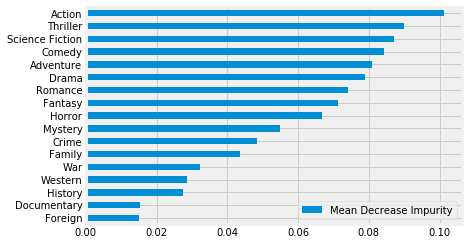

In [147]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred = rfc.predict(x_test)
print(rfc.score(x_test,y_test))

feat_scores = pd.DataFrame({'Mean Decrease Impurity': rfc.feature_importances_},
                          index=df2.drop(['book'],axis=1).columns)
feat_scores = feat_scores.sort_values(by='Mean Decrease Impurity')
feat_scores.plot(kind='barh')

0.971217643211


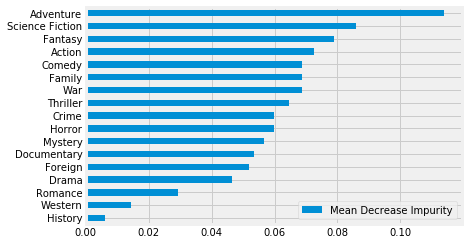

In [148]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_predict = gbc.predict(x_test)
print(gbc.score(x_test,y_test))

feat_scores = pd.DataFrame({'Mean Decrease Impurity': gbc.feature_importances_},
                          index=df2.drop(['book'],axis=1).columns)
feat_scores = feat_scores.sort_values(by='Mean Decrease Impurity')
feat_scores.plot(kind='barh')

In [214]:
booksdata = pd.read_csv('BX-Books.csv',sep=';',error_bad_lines=False,encoding='latin-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [215]:
booksdata = booksdata.drop(['Image-URL-S','Image-URL-M','Image-URL-L'],axis=1)
booksdata = booksdata.drop([209538,221678,220731])
booksdata['Year-Of-Publication'] = booksdata['Year-Of-Publication'].astype(int)
booksdata = booksdata[booksdata['Year-Of-Publication'] != 0]

In [216]:
booksdata[booksdata['Book-Author'] == 'Dan Brown']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
118,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star
237,0671027387,Deception Point,Dan Brown,2002,Pocket
239,0743486226,Angels &amp; Demons,Dan Brown,2003,Atria
358,0312995423,Digital Fortress : A Thriller,Dan Brown,2003,St. Martin's Press
748,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
2815,0312263120,Digital Fortress : A Thriller,Dan Brown,2000,St. Martin's Griffin
4064,8495618605,El Codigo Da Vinci / The Da Vinci Code,Dan Brown,2003,Ediciones Urano
11174,3404148665,Illuminati.,Dan Brown,2003,LÃ?Â¼bbe
28002,0671027352,Angels &amp; Demons,Dan Brown,2000,Atria
36935,0743535774,Angels &amp; Demons,Dan Brown,2003,Audioworks


In [202]:
booksdata[booksdata['Book-Title'] == 'Deception Point']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
237,0671027387,Deception Point,Dan Brown,2002,Pocket
60253,0671027379,Deception Point,Dan Brown,2001,Atria
93338,0743490304,Deception Point,Dan Brown,2003,Atria


In [205]:
#If performance is important:

def f(df):
     keys,values=df.sort_values('a').values.T
     ukeys,index=np.unique(keys,True)
     arrays=np.split(values,index[1:])
     df2=pd.DataFrame({'a':ukeys,'b':[list(a) for a in arrays]})
     return df2

In [ ]:
booksdata.groupby('Book-Title').max()['Year-Of-Publication'].reset_index()
#booksdata = booksdata.loc[booksdata['Year-Of-Publication'] == year]

In [213]:
booksdata[booksdata['Book-Title'] == 'Deception Point']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
